### Importing the necessary header files:

In [ ]:
### Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ML Libraries:
## Preprocessing:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest,  chi2, f_classif, f_regression, mutual_info_regression
from sklearn.decomposition import PCA   ### dimensionality reduction

## Models:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Pipeline
from sklearn.pipeline import Pipeline

## Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Evalution:
from sklearn.metrics import mean_squared_error,r2_score

import joblib

import xgboost
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor

In [ ]:
!pip install lightgbm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**General Steps to follow::**

1. Define the problem: Clearly articulate the problem you want to solve using machine learning. Identify whether it is a classification, regression, clustering, or other types of tasks.

2. Preprocessing: Handle missing values, outliers, formatting, Label Encoding/One hot encoding

Feature Removal:
- Simple Correlation

3. Split the data: train_test_split

4. Feature Selection:
- Feature importance from tree-based models
- Feature selection --> statistical methods using SelectKBest
- Principal Component Analysis (PCA)

5. Choose candidate algorithms: Baseline models

6. Initial training and evaluation: Train each candidate algorithm on the training set and evaluate its performance on the testing set using appropriate metrics (e.g., accuracy, F1-score, mean squared error, etc.).

7. Hyperparameter tuning: Grid Search/ Randomised Search

8. Model comparison: Compare the performance of each algorithm based on the evaluation metrics. Consider factors such as accuracy, interpretability, training time, and ease of implementation.

9. Fine-tuning: If necessary, fine-tune the top-performing algorithms by making further adjustments to hyperparameters or exploring different feature sets.

10. Ensemble methods: bagging, boosting, or stacking

11. Final evaluation: Evaluate the top-performing models using k-fold cross-validation to obtain a more robust estimate of their performance.

12. Select the best algorithm: Based on the evaluation results, choose the algorithm that performs the best on the validation set or cross-validation.

13. Test on unseen data: Once you have selected the best algorithm, test it on completely unseen data to ensure its generalization to new samples.

### Preprocessing the data:

In [ ]:
### import the data set
df=pd.read_csv("/content/drive/MyDrive/Kural's Project/OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.shape

(39644, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
### checking missing values
df.isnull().sum().sum()

0

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
df.drop(['url'],axis=1,inplace=True)

In [ ]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
sample=df[df.columns[:5]]

### Feature Removal

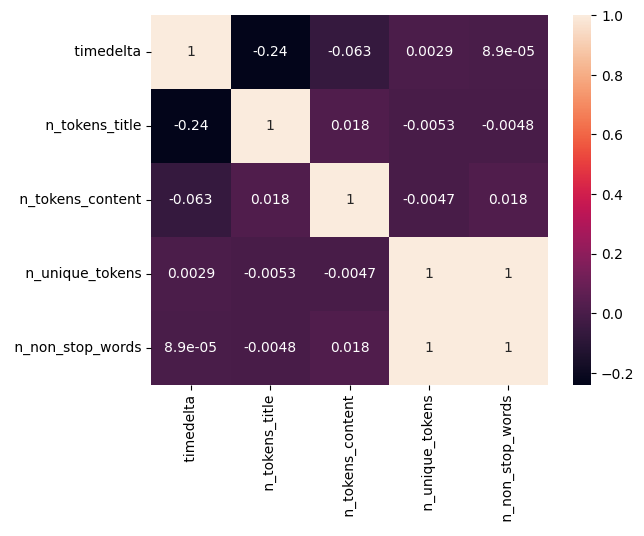

In [ ]:
### checking for Collinearity:::
corr_matrix1=sample.corr()
sns.heatmap(corr_matrix1,annot=True)
plt.show()

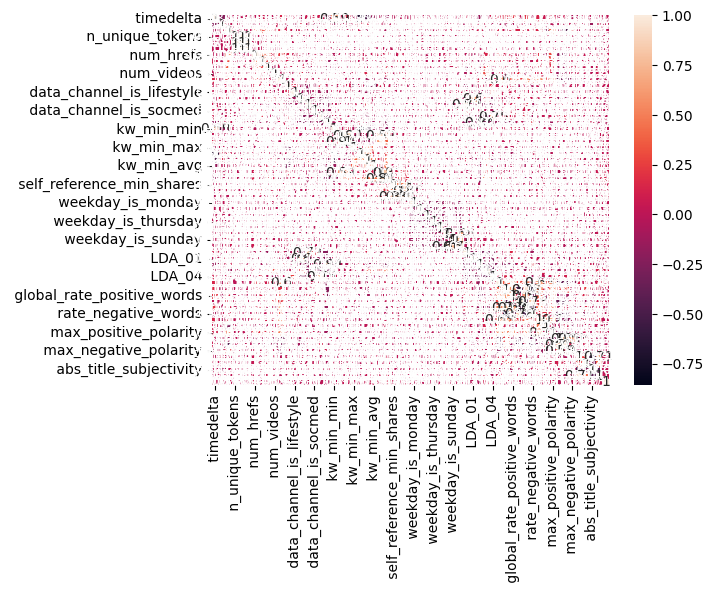

In [ ]:
### checking for Collinearity:::
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
### Dropping the highly correlated variables
correlated_features = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  ### Custom threshold - Correlation Coefficient
            colname = corr_matrix.columns[i]
            correlated_features[colname]=corr_matrix.iloc[i, j]

correlated_features

{' n_non_stop_words': 0.9995717371218911,
 ' n_non_stop_unique_tokens': 0.9995323282505376,
 ' kw_avg_min': 0.9405286635291802,
 ' kw_max_max': -0.8572262246429739,
 ' kw_avg_avg': 0.8118643951010985,
 ' self_reference_avg_sharess': 0.8534802286627771,
 ' is_weekend': 0.7016478068288454,
 ' LDA_00': 0.7746505220376488,
 ' LDA_02': 0.8366182756593871,
 ' LDA_04': 0.7497371213874283,
 ' rate_positive_words': 0.7278273896609666,
 ' rate_negative_words': 0.7795556150649772,
 ' max_positive_polarity': 0.7035581335809635,
 ' min_negative_polarity': 0.7488961778499011,
 ' abs_title_sentiment_polarity': 0.7145275893497952}

In [ ]:
correlated_features.keys()

dict_keys([' n_non_stop_words', ' n_non_stop_unique_tokens', ' kw_avg_min', ' kw_max_max', ' kw_avg_avg', ' self_reference_avg_sharess', ' is_weekend', ' LDA_00', ' LDA_02', ' LDA_04', ' rate_positive_words', ' rate_negative_words', ' max_positive_polarity', ' min_negative_polarity', ' abs_title_sentiment_polarity'])

In [ ]:
### Dropping highly correlated features:
df.drop(correlated_features,axis=1,inplace=True)

In [ ]:
### Checking for variance 0 features:
for i in df.columns:
  print(f"{i}  ----->  {df[i].var()}")

 timedelta  ----->  45866.11916834746
 n_tokens_title  ----->  4.469151626862218
 n_tokens_content  ----->  221942.2840450277
 n_unique_tokens  ----->  12.395387153670537
 num_hrefs  ----->  128.41461781021283
 num_self_hrefs  ----->  14.862113250758988
 num_imgs  ----->  69.04668541671356
 num_videos  ----->  16.874473409413707
 average_token_length  ----->  0.7130207585328796
 num_keywords  ----->  3.6447788306366333
 data_channel_is_lifestyle  ----->  0.05014418387468056
 data_channel_is_entertainment  ----->  0.1463256689096183
 data_channel_is_bus  ----->  0.13294008983767044
 data_channel_is_socmed  ----->  0.055164349563777616
 data_channel_is_tech  ----->  0.1509671909777816
 data_channel_is_world  ----->  0.167386403598642
 kw_min_min  ----->  4848.784648149195
 kw_max_min  ----->  14884093.603388896
 kw_min_max  ----->  3362379600.6339865
 kw_avg_max  ----->  18252617221.396557
 kw_min_avg  ----->  1293808.314862031
 kw_max_avg  ----->  37196239.144845486
 self_reference_min_

In [ ]:
## Optional::
final_col=[i for i in df.columns if df[i].var()<0.05]   ### change the threshold
len(final_col)

10

In [ ]:
df.shape

(39644, 45)

### Splitting:

In [ ]:
### Split the data::
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [ ]:
### Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape,X_test.shape

((31715, 44), (7929, 44))

### Scaling:

In [ ]:
### Standard Scaling for the features::
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.07492934,  2.16717557,  0.16399143, ...,  0.54151173,
         0.98307273, -1.59157531],
       [ 1.68720402,  0.28157646, -0.2984382 , ..., -0.87139635,
        -0.26654053,  0.83835416],
       [-0.43016047, -1.60402265, -0.43357745, ..., -0.87139635,
        -0.26654053,  0.83835416],
       ...,
       [-1.49117976,  0.28157646, -0.79887575, ..., -0.40899007,
        -0.45398252,  0.04310452],
       [ 1.69187811, -1.60402265, -0.97202291, ...,  0.66995792,
         0.67066941, -1.81247799],
       [ 0.34106501, -0.18982332, -0.54971275, ..., -0.87139635,
        -0.26654053,  0.83835416]])

### Feature Selection:

In [ ]:
### Feature Selection::

## Gradient Boosting Techniques

In [ ]:
## PCA:
pca = PCA(n_components=30)
X_pca=pca.fit_transform(X_train)

In [ ]:
X_pca.shape

(31715, 30)

In [ ]:
## SelectKBest::  ### Shortlist, Not changed unlike that of PCA
s_anova=SelectKBest(score_func=f_regression,k=30)  ###chi2 ---> chi-square,f_classif ----> ANOVA, mutual_info ---->
X_anova=s_anova.fit_transform(X_train,y_train)

s_mi=SelectKBest(score_func=mutual_info_regression,k=30)
X_mi=s_mi.fit_transform(X_train,y_train)

In [ ]:
X_mi

array([[-0.07492934,  2.16717557, -0.01073907, ...,  0.07777315,
         0.54151173, -1.59157531],
       [ 1.68720402,  0.28157646, -0.00822382, ...,  0.07777315,
        -0.87139635,  0.83835416],
       [-0.43016047, -1.60402265,  0.01457343, ...,  0.60090774,
        -0.87139635,  0.83835416],
       ...,
       [-1.49117976,  0.28157646,  0.02914218, ...,  0.60090774,
        -0.40899007,  0.04310452],
       [ 1.69187811, -1.60402265,  0.07957927, ..., -0.96849604,
         0.66995792, -1.81247799],
       [ 0.34106501, -0.18982332,  0.03270833, ...,  0.07777315,
        -0.87139635,  0.83835416]])

[0.02198599 0.0431718  0.0486495  0.04181277 0.01141604 0.05495597
 0.032265   0.00922649 0.01761284 0.02520399 0.04141335 0.02475282
 0.02644443 0.00437989 0.00667005 0.00764361 0.00135144 0.03225123
 0.02308421 0.02535002 0.01418263 0.04801164 0.01525384 0.02687358
 0.00949172 0.05221523 0.00944496 0.00335946 0.01176479 0.02064742
 0.00256002 0.01614499 0.01784358 0.01081092 0.01005599 0.00830583
 0.00814131 0.03152722 0.00472835 0.02809248 0.04099613 0.07350802
 0.02754711 0.00885129]


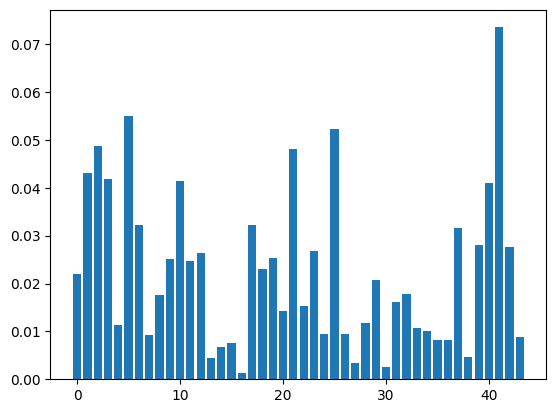

In [ ]:
### Any ensemble will have a method called feature_importances_
model = XGBRegressor()    ### RandomForestClassifier
model.fit(X_train, y_train)
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
## Checking the results of the XGB model:
feat_xgb = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feat_xgb[feature] = importance # add the name/value pair

for ind,(i,j) in enumerate(feat_xgb.items()):
  if ind==43:
    print(i,j)
col_xgb=[ind for ind,(i,j) in enumerate(feat_xgb.items()) if j>0.00885129]  ## shortlisting features.

 abs_title_subjectivity 0.00885129


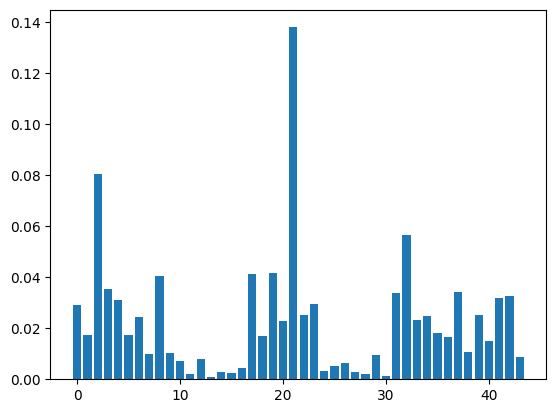

In [ ]:
model = RandomForestRegressor()    ### RandomForestClassifier
model.fit(X_train, y_train)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
## Checking the results of the XGB model:
feat_rf = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feat_rf[feature] = importance # add the name/value pair

for ind,(i,j) in enumerate(feat_rf.items()):
  if ind==38:
    print(i,j)
col_rf=[ind for ind,(i,j) in enumerate(feat_rf.items()) if j>0.010721511912542902]  ## shortlisting features.

 min_positive_polarity 0.010721511912542902


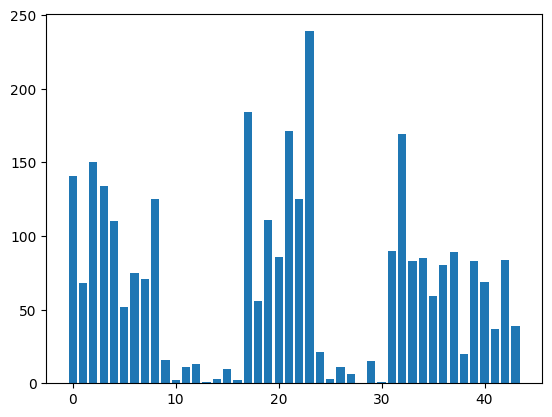

In [ ]:
model = LGBMRegressor()    ### RandomForestClassifier
model.fit(X_train, y_train)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
## Checking the results of the LGBM model:
feat_lgb = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feat_lgb[feature] = importance # add the name/value pair

# for ind,(i,j) in enumerate(feat_lgb.items()):
#   if ind==38:
#     print(i,j)
col_lgb=[ind for ind,(i,j) in enumerate(feat_lgb.items()) if j>20]  ## shortlisting features.

In [ ]:
### Train datasets ready:
X_lgb=X_train[:,col_lgb]
X_xgb=X_train[:,col_xgb]
X_rf=X_train[:,col_rf]
#X_anova
#X_mi
#X_pca

### Baseline Model Testing:

In [ ]:
%%time
model=[SVR(),LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_rf,y_train,cv=5,scoring='neg_root_mean_squared_error')
  dict_model_results[str(i)]=np.array(acc_score).mean()

CPU times: user 13min 6s, sys: 1.42 s, total: 13min 8s
Wall time: 13min 13s


In [ ]:
dict_model_results

{'SVR()': -11301.665940993411,
 'LinearRegression()': -11287.344058582225,
 'DecisionTreeRegressor()': -21121.55881699531,
 'RandomForestRegressor()': -11583.709091119632,
 'Ridge()': -11234.261909918298,
 'Lasso()': -11045.525353555739}

Based on the results obtained, we can conclude that majority of the models obtain best results on the ANOVA based feature selection.

### Hyperparameter tuning the best models:

In [ ]:
### Takes so much time!
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
# model=SVR()
# rs_svr=RandomizedSearchCV(model,param_distributions=parameters,cv=10,verbose=2, n_jobs = 4)
# rs_svr.fit(X_anova,y_train)
# rs_svr.best_params_

# model=SVR(**rs_svr.best_params_)
# model.fit(X_train)
# y_pred=model.predict()
# rmse=mean_squared_error(y_test,y_pred)**0.5
# rmse

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

In [ ]:
param_grid={"alpha":[0.001, 0.01, 0.1, 1.0, 10.0]}
model_lasso=Lasso()
rs_svr=RandomizedSearchCV(model,param_distributions=param_grid,cv=10,verbose=2, n_jobs = 4)
rs_svr.fit(X_anova,y_train)
rs_svr.best_params_

model=Lasso(**rs_svr.best_params_)
model.fit(X_anova,y_train)

### Transforming the test set::
X_test_anova=s_anova.transform(X_test)

## calculating predictions:
y_pred=model.predict(X_test_anova)
rmse=mean_squared_error(y_test,y_pred)**0.5
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 5 candidates, totalling 50 fits


10863.233525156278

In [ ]:
filename = "/content/drive/MyDrive/Kural's Project/Shares_baseline.sav"
joblib.dump(model_lasso, filename)

["/content/drive/MyDrive/Kural's Project/Shares_baseline.sav"]

### Trying out the Ensemble Techniques

In [ ]:
%%time
model=[XGBRegressor(), LGBMRegressor()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_anova,y_train,cv=5,scoring='neg_root_mean_squared_error')
  dict_model_results[str(i)]=np.array(acc_score).mean()

CPU times: user 1min 4s, sys: 105 ms, total: 1min 4s
Wall time: 42.3 s


In [ ]:
dict_model_results

{'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=None, ...)': -12195.880511213247,
 'LGBMRegressor()': -11344.055689688032}

### Hyperparameter Tuning the best ensemble model:

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0]
}

lgb_model=LGBMRegressor()
random_search = RandomizedSearchCV(lgb_model, param_grid, cv=5)

# Fit the grid search to the training data
random_search.fit(X_anova, y_train)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(),
                   param_distributions={'bagging_fraction': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'feature_fraction': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0]})

In [ ]:
# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_

model_lgb=LGBMRegressor(**best_params)
model_lgb.fit(X_anova,y_train)

pred=model.predict(X_test_anova)
rmse=mean_squared_error(y_test,pred)**0.5
rmse

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


10861.039774301316

In [ ]:
### Saving the best model:
filename = "/content/drive/MyDrive/Kural's Project/Shares_ensemble.sav"
joblib.dump(model_lgb, filename)

["/content/drive/MyDrive/Kural's Project/Shares_ensemble.sav"]

### Comparing Model Results:

In [ ]:
# load the model from disk
filename1="/content/drive/MyDrive/Kural's Project/Shares_ensemble.sav"
ensemble_model = joblib.load(filename1)

ensemble_model.fit(X_anova,y_train)
pred_ensemble=ensemble_model.predict(X_test_anova)

rmse_ensemble=mean_squared_error(y_test,pred_ensemble)**0.5

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
# load the model from disk
filename2="/content/drive/MyDrive/Kural's Project/Shares_baseline.sav"
baseline_model = joblib.load(filename2)

baseline_model.fit(X_anova,y_train)
pred_baseline=baseline_model.predict(X_test_anova)

rmse_baseline=mean_squared_error(y_test,pred_baseline)**0.5

In [ ]:
print(f"The RMSE obtained from Ensemble is:{rmse_ensemble}")
print(f"The RMSE obtained from Baseline is:{rmse_baseline}")

The RMSE obtained from Ensemble is:10861.039774301316
The RMSE obtained from Baseline is:10863.066936545614


Plotting the Normal Distribution curve for target outputs

[]

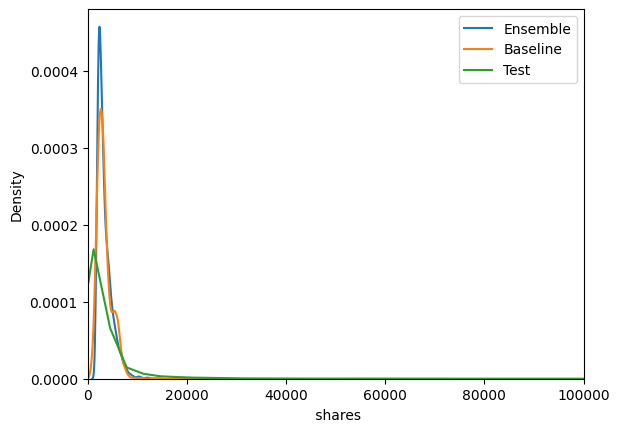

In [ ]:
### Observing the degree of accuracy of predictions with original test set
sns.kdeplot(pred_ensemble,label="Ensemble")
sns.kdeplot(pred_baseline,label="Baseline")
sns.kdeplot(y_test,label="Test")
plt.legend()
plt.xlim([0,100000])
plt.plot()

[]

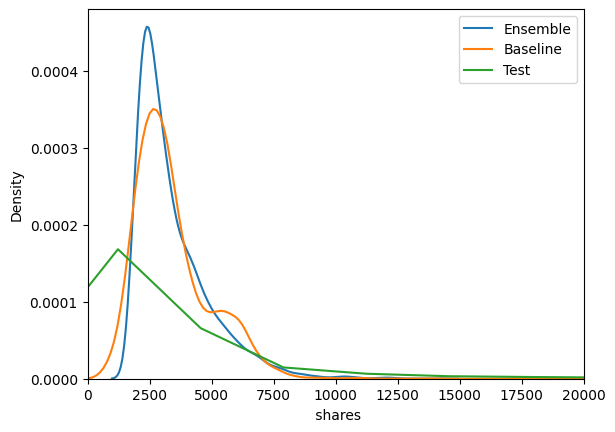

In [ ]:
### Observing the degree of accuracy of predictions with original test set
sns.kdeplot(pred_ensemble,label="Ensemble")
sns.kdeplot(pred_baseline,label="Baseline")
sns.kdeplot(y_test,label="Test")
plt.legend()
plt.xlim([0,20000])
plt.plot()